<a href="https://colab.research.google.com/github/SoNdA11/Appoia/blob/main/projeto_ia2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Célula 1: Configuração do Ambiente e Extração de Dados
Esta célula prepara a infraestrutura necessária no Google Colab. Ela realiza a montagem do Google Drive para garantir acesso persistente aos arquivos e verifica a existência do arquivo compactado do dataset (archive.zip). Em seguida, utiliza a biblioteca zipfile (via comando !unzip) para extrair as imagens no ambiente temporário da máquina virtual, garantindo que os dados estejam prontos para leitura rápida pelo modelo.

In [ ]:
import os
import shutil
from google.colab import drive

print("--- CONECTANDO AO GOOGLE DRIVE ---")

# 1. Monta o Drive
drive.mount('/content/drive')

# Caminho onde você salvou o arquivo no Drive
zip_path_no_drive = '/content/drive/My Drive/Datasets/archive.zip'

# 2. Verifica se o arquivo existe lá
if not os.path.exists(zip_path_no_drive):
    print(f"ERRO: Não achei o arquivo em '{zip_path_no_drive}'")
    print("DICA: Verifique se o nome da pasta ou do arquivo estão certos no seu Drive.")
else:
    print("Arquivo encontrado no Drive! Copiando e descompactando...")

    # 3. Limpa a pasta antiga
    if os.path.exists('pokemon_species_data'):
        shutil.rmtree('pokemon_species_data')

    # 4. Descompacta
    # Estamos descompactando direto do Drive para o Colab
    !unzip -q "{zip_path_no_drive}" -d pokemon_species_data

    print("Sucesso! Dataset pronto para uso.")

--- CONECTANDO AO GOOGLE DRIVE ---
Mounted at /content/drive
Arquivo encontrado no Drive! Copiando e descompactando...
Sucesso! Dataset pronto para uso.


# Célula 2: Engenharia de Dados e Organização de Diretórios
Responsável pelo pré-processamento da estrutura de arquivos. O código varre o diretório descompactado para localizar a raiz correta das imagens (buscando por uma pasta de referência, como "Pikachu") e organiza todas as 150 classes de Pokémon em um diretório de trabalho limpo e padronizado (dataset_final). Isso corrige eventuais inconsistências na estrutura de pastas vindas do download original.

In [ ]:
import shutil
import os

# --- BUSCA AUTOMÁTICA DA PASTA ---
print("Localizando onde as pastas dos Pokémons foram parar...")

source_dir = None
# O os.walk vai entrar em todas as subpastas até achar o Pikachu
# Usamos o Pikachu como referência para saber que chegamos na pasta certa
for root, dirs, files in os.walk("pokemon_species_data"):
    if "Pikachu" in dirs:
        source_dir = root
        print(f"ACHEI! As imagens estão em: {source_dir}")
        break

if source_dir is None:
    raise SystemExit("ERRO: Descompactou, mas não achei a pasta 'Pikachu'. O zip pode estar vazio.")

# --- CONFIGURAÇÃO ---
working_dir = 'dataset_final'

# Limpeza da pasta de trabalho anterior
if os.path.exists(working_dir):
    shutil.rmtree(working_dir)
os.makedirs(working_dir)

print(f"\nPreparando TODOS os Pokémons do dataset...")

todas_pastas = os.listdir(source_dir)
count = 0

for item in todas_pastas:
    src_path = os.path.join(source_dir, item)
    dst_path = os.path.join(working_dir, item)

    if os.path.isdir(src_path):
        shutil.copytree(src_path, dst_path)
        count += 1

print(f"Sucesso! {count} espécies de Pokémon preparadas na pasta '{working_dir}'.")

Localizando onde as pastas dos Pokémons foram parar...
ACHEI! As imagens estão em: pokemon_species_data/PokemonData

Preparando TODOS os Pokémons do dataset...
Sucesso! 150 espécies de Pokémon preparadas na pasta 'dataset_final'.


# Célula 3: Pipeline (CNN, Transfer Learning e Fine-Tuning)

# Célula 3: model_cnn
Esta é a etapa principal. Definimos uma Rede Neural Convolucional (CNN).

Pré-processamento: As imagens são redimensionadas para 128x128 pixels.

Data Augmentation: Aplicamos rotações e zoom aleatórios para evitar que a IA 'decore' as imagens (overfitting).

Arquitetura: Usamos 3 camadas de convolução (Conv2D) para extrair características visuais, seguidas de camadas de MaxPooling para reduzir a dimensão.

Treinamento: A rede treina por 25 épocas. Como agora temos muito mais classes (aprox 150), o treinamento será mais longo e o gráfico de acurácia subirá mais devagar.

Carregando dataset completo...
Found 6820 files belonging to 150 classes.
Using 5456 files for training.
Found 6820 files belonging to 150 classes.
Using 1364 files for validation.
Total de Classes encontradas: 150
Epoch 1/35


/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


171/171 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.0086 - loss: 5.0432 - val_accuracy: 0.0176 - val_loss: 4.8445
Epoch 2/35
171/171 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.0191 - loss: 4.8017 - val_accuracy: 0.0469 - val_loss: 4.4648
Epoch 3/35
171/171 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.0380 - loss: 4.5034 - val_accuracy: 0.0762 - val_loss: 4.1193
Epoch 4/35
171/171 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.0573 - loss: 4.2626 - val_accuracy: 0.1246 - val_loss: 3.8242
Epoch 5/35
171/171 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.0893 - loss: 4.0175 - val_accuracy: 0.1767 - val_loss: 3.5786
Epoch 6/35
171/171 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.1146 - loss: 3.7990 - val_accuracy: 0.2493 - val_loss: 3.2514
Epoch 7/35
171/171 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.1482 - loss: 3.5484 - val_accuracy: 0.2713 - val_loss: 3.0056
Epoch 8/35
171/171 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.1853 - loss: 3.2946 - val_accuracy: 0.31

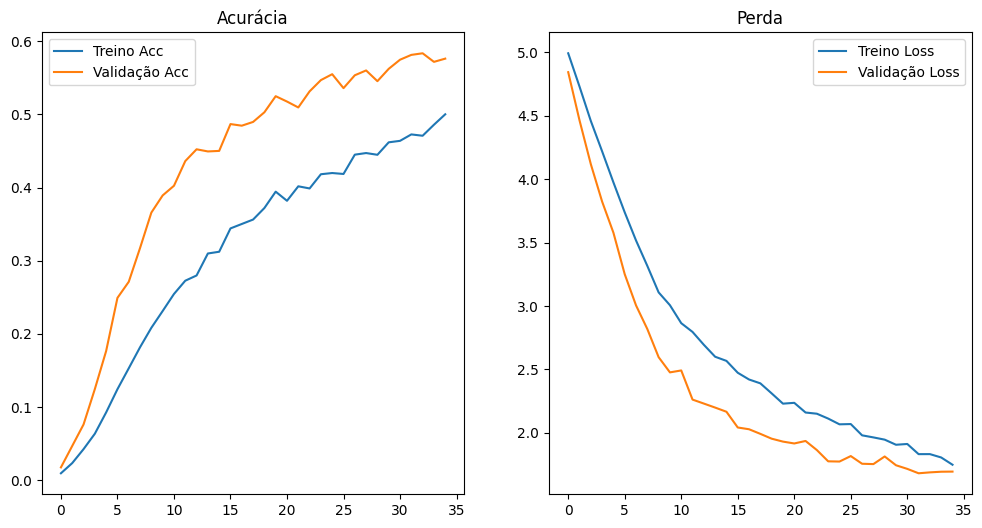

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Configurações
IMG_SIZE = 128
BATCH_SIZE = 32
EPOCHS = 35
DATA_DIR = 'dataset_final'

# Carregar dados (Treino 80% / Validação 20%)
print("Carregando dataset completo...")
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR, validation_split=0.2, subset="training", seed=123,
    image_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR, validation_split=0.2, subset="validation", seed=123,
    image_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE
)

class_names = train_ds.class_names
print(f"Total de Classes encontradas: {len(class_names)}")

# Otimização de performance (Cache na memória)
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Data Augmentation (Variações artificiais nas imagens)
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.1),
  layers.RandomZoom(0.1),
])

# Modelo CNN
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(IMG_SIZE, IMG_SIZE, 3)), # Normaliza pixels (0 a 1)
    data_augmentation,

    # Extração de Características
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    # Classificação
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5), # Desliga neurônios aleatórios para forçar aprendizado
    layers.Dense(len(class_names)) # Camada final com o número total de Pokémons
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Treino
history = model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS)

# Geração de Gráficos para o Artigo
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Treino Acc')
plt.plot(epochs_range, val_acc, label='Validação Acc')
plt.title('Acurácia')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Treino Loss')
plt.plot(epochs_range, val_loss, label='Validação Loss')
plt.title('Perda')
plt.legend()
plt.show()

model.save('modelo_pokemon_completo.keras')

# Célula 3: model_mobilenet

Em vez de treinar uma rede do zero, vamos pegar um "cérebro" de IA que já foi treinado pelo Google em milhões de imagens (chamado MobileNetV2) e ensinar ele apenas a diferenciar os Pokémons. Com o MobileNetV2 aumenta a acurácia.

Isso se chama Transfer Learning. A rede já sabe identificar bordas, formas e texturas; nós só vamos "afinar" o conhecimento dela.

Carregando dataset...
Found 6820 files belonging to 150 classes.
Using 5456 files for training.
Found 6820 files belonging to 150 classes.
Using 1364 files for validation.
Baixando o cérebro da MobileNetV2...


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_6 (Sequential)       │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide_2 (TrueDivide)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract_2 (Subtract)           │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 150)            │       192,150 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,450,134 (9.35 MB)

 Trainable params: 192,150 (750.59 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Iniciando Transfer Learning...
Epoch 1/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.0093 - loss: 5.6509 - val_accuracy: 0.0315 - val_loss: 4.8084
Epoch 2/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.0527 - loss: 4.7219 - val_accuracy: 0.1048 - val_loss: 4.2384
Epoch 3/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.1286 - loss: 4.0780 - val_accuracy: 0.1935 - val_loss: 3.7657
Epoch 4/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.2079 - loss: 3.5947 - val_accuracy: 0.2654 - val_loss: 3.3970
Epoch 5/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.2968 - loss: 3.2008 - val_accuracy: 0.3446 - val_loss: 3.0767
Epoch 6/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.3664 - loss: 2.8669 - val_accuracy: 0.3922 - val_loss: 2.8193
Epoch 7/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.4290 - loss: 2.5869 - val_accuracy: 0.4413 - val_loss: 2.6143
Epoch 8/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 

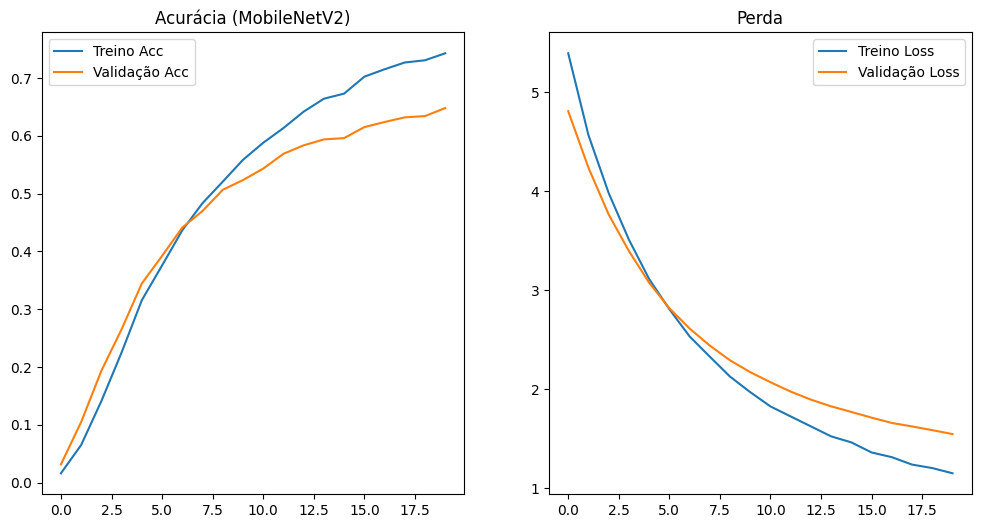

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Configurações
IMG_SIZE = 128
BATCH_SIZE = 32
EPOCHS = 20  # Com Transfer Learning, precisamos de menos épocas
DATA_DIR = 'dataset_final'

# Carregar dados
print("Carregando dataset...")
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR, validation_split=0.2, subset="training", seed=123,
    image_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR, validation_split=0.2, subset="validation", seed=123,
    image_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE
)

class_names = train_ds.class_names
num_classes = len(class_names)

# Otimização
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Data Augmentation
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomContrast(0.2), # Adicionei contraste para ajudar
])

# --- TRANSFER LEARNING ---
print("Baixando o cérebro da MobileNetV2...")

# 1. Baixamos o modelo pré-treinado (MobileNetV2) sem a parte final (include_top=False)
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'
)

# 2. Congelamos o modelo base para não estragar o que ele já sabe
base_model.trainable = False

# 3. Criamos o nosso modelo montado em cima do MobileNetV2
inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = data_augmentation(inputs)
# O pré-processamento específico da MobileNet é OBRIGATÓRIO
x = tf.keras.applications.mobilenet_v2.preprocess_input(x)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x) # Resume as características
x = layers.Dropout(0.2)(x) # Evita overfitting
outputs = layers.Dense(num_classes)(x) # Camada final com 150 classes

model = models.Model(inputs, outputs)

# Compilação
# Usamos um learning rate menor para não ser brusco
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

# Treino
print("Iniciando Transfer Learning...")
history = model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS)

# Gráficos
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Treino Acc')
plt.plot(epochs_range, val_acc, label='Validação Acc')
plt.title('Acurácia (MobileNetV2)')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Treino Loss')
plt.plot(epochs_range, val_loss, label='Validação Loss')
plt.title('Perda')
plt.legend()
plt.show()

model.save('modelo_pokemon_mobilenet.keras')

# Célula 3: model_finetuned


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import matplotlib.pyplot as plt

# --- CONFIGURAÇÕES ---
IMG_SIZE = 128
BATCH_SIZE = 32
DATA_DIR = 'dataset_final'

# 1. Carregar Dados
print("Carregando dataset...")
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR, validation_split=0.2, subset="training", seed=123,
    image_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR, validation_split=0.2, subset="validation", seed=123,
    image_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE
)

class_names = train_ds.class_names
num_classes = len(class_names)
print(f"Classes detectadas: {num_classes}")

# Otimização
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Data Augmentation
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomContrast(0.2),
])

# --- MODELO BASE (MobileNetV2) ---
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False # Congela o cérebro inicial

# Cabeçalho de Classificação
inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = data_augmentation(inputs)
x = tf.keras.applications.mobilenet_v2.preprocess_input(x)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(num_classes)(x) # Sem ativação aqui pois usaremos from_logits=True

model = models.Model(inputs, outputs)

# Compilação Inicial
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# --- CALLBACKS (O segredo da performance) ---
# Salva apenas o melhor modelo (não perde tempo salvando modelos ruins)
checkpoint = callbacks.ModelCheckpoint(
    'melhor_pokemon_model.keras', save_best_only=True, monitor='val_accuracy', mode='max'
)
# Para se não melhorar por 5 épocas
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

# --- ETAPA 1: TREINO INICIAL (Feature Extraction) ---
print("\n--- FASE 1: Treinando a cabeça da rede ---")
epochs_initial = 15
history_1 = model.fit(
    train_ds, validation_data=val_ds, epochs=epochs_initial,
    callbacks=[checkpoint, early_stopping]
)

# --- ETAPA 2: FINE-TUNING (Ajuste Fino) ---
print("\n--- FASE 2: Fine-Tuning (Descongelando camadas finais) ---")
base_model.trainable = True

# Congela as primeiras camadas (deixa treinar só as últimas 40, por exemplo)
# Isso evita destruir o que a rede já sabe de básico (bordas, formas)
for layer in base_model.layers[:-40]:
    layer.trainable = False

# Recompila com learning rate MUITO BAIXO para não estragar os pesos
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Treina mais um pouco
epochs_fine = 15
total_epochs = epochs_initial + epochs_fine

history_fine = model.fit(
    train_ds, validation_data=val_ds,
    initial_epoch=history_1.epoch[-1],
    epochs=total_epochs,
    callbacks=[checkpoint, early_stopping]
)

print("Treino Concluído! Melhor modelo salvo como 'melhor_pokemon_model.keras'")

Carregando dataset...
Found 6820 files belonging to 150 classes.
Using 5456 files for training.
Found 6820 files belonging to 150 classes.
Using 1364 files for validation.
Classes detectadas: 150
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

--- FASE 1: Treinando a cabeça da rede ---
Epoch 1/15
171/171 ━━━━━━━━━━━━━━━━━━━━ 32s 66ms/step - accuracy: 0.1127 - loss: 4.7547 - val_accuracy: 0.4846 - val_loss: 2.2258
Epoch 2/15
171/171 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.5801 - loss: 1.7555 - val_accuracy: 0.5916 - val_loss: 1.6750
Epoch 3/15
171/171 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.6899 - loss: 1.2310 - val_accuracy: 0.6371 - val_loss: 1.4632
Epoch 4/15
171/171 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.7612 - loss: 0.9079 - val_accuracy: 0.6393 - val_loss: 1.4008
Epoch 5/15
171/171 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.7895 - loss: 0.7928 - val_accuracy: 0.6642 - val_loss: 1.3097
Epoch 6/15
171/171 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 

# Célula 4: Visualização dos Resultados


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


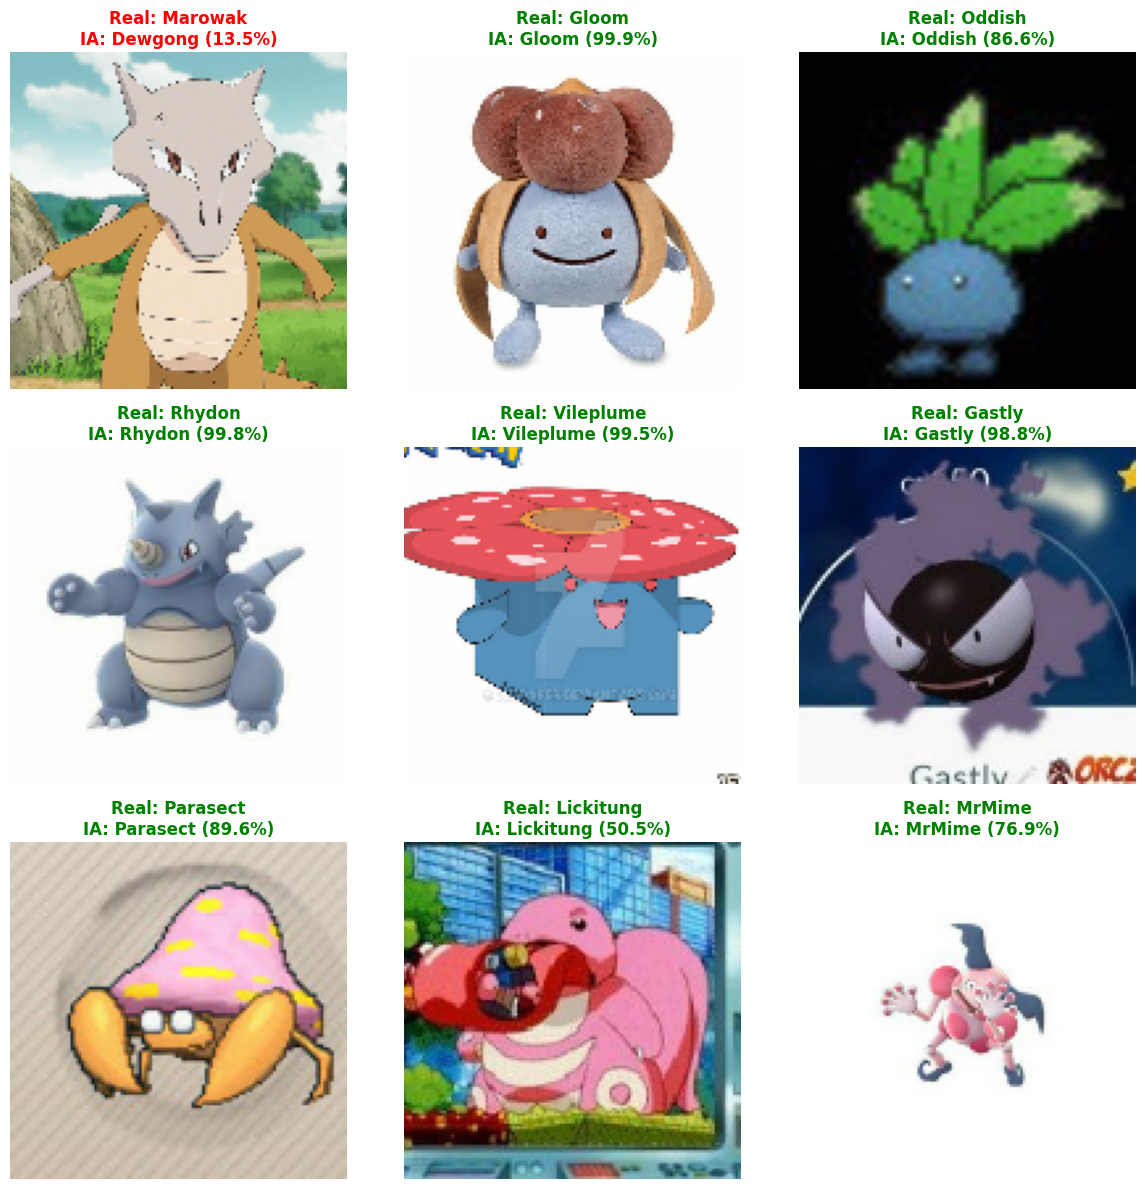

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Pega um lote de imagens do conjunto de validação
image_batch, label_batch = next(iter(val_ds))

# Define o tamanho do grid (ex: 3x3 = 9 imagens)
rows = 3
cols = 3
num_images = rows * cols

plt.figure(figsize=(12, 12))

for i in range(num_images):
    ax = plt.subplot(rows, cols, i + 1)

    # Prepara a imagem
    img = image_batch[i].numpy().astype("uint8")
    label_real = class_names[label_batch[i]]

    # Expande a dimensão para (1, 128, 128, 3) pois o modelo espera um lote
    img_array = tf.expand_dims(image_batch[i], 0)

    # Usa o modelo ATUALMENTE CARREGADO na memória
    # Se você rodou o MobileNet por último, vai usar ele.
    # Se rodou a CNN Simples por último, vai usar ela.
    predictions = model.predict(img_array)

    # Transforma os números brutos em porcentagem
    score = tf.nn.softmax(predictions[0])

    # Pega o nome da classe com maior nota
    pred_label = class_names[np.argmax(score)]
    confianca = 100 * np.max(score)

    # Mostra a imagem
    plt.imshow(img)

    # Lógica de cor: Verde (Acerto) / Vermelho (Erro)
    if pred_label == label_real:
        cor_texto = "green"
        texto_resultado = f"Real: {label_real}\nIA: {pred_label} ({confianca:.1f}%)"
    else:
        cor_texto = "red"
        # Mostra o real e o que a IA errou
        texto_resultado = f"Real: {label_real}\nIA: {pred_label} ({confianca:.1f}%)"

    plt.title(texto_resultado, color=cor_texto, fontweight='bold')
    plt.axis("off")

plt.tight_layout()
plt.show()

# Célula 5: Métricas


--- GERANDO RELATÓRIO DETALHADO DE PERFORMANCE ---
Processando previsões no conjunto de validação...

>>> RELATÓRIO DE CLASSIFICAÇÃO POR POKÉMON <<<
                  precision    recall  f1-score   support

            Abra       0.86      0.55      0.67        11
      Aerodactyl       1.00      0.80      0.89         5
        Alakazam       1.00      0.44      0.62         9
Alolan Sandslash       0.44      0.78      0.56         9
           Arbok       0.67      1.00      0.80         2
        Arcanine       1.00      0.33      0.50         6
        Articuno       0.62      0.83      0.71         6
        Beedrill       1.00      0.78      0.88         9
      Bellsprout       0.67      0.80      0.73         5
       Blastoise       0.86      0.67      0.75         9
       Bulbasaur       0.67      1.00      0.80         6
      Butterfree       1.00      0.88      0.93         8
        Caterpie       0.78      0.78      0.78         9
         Chansey       1.00      0.88

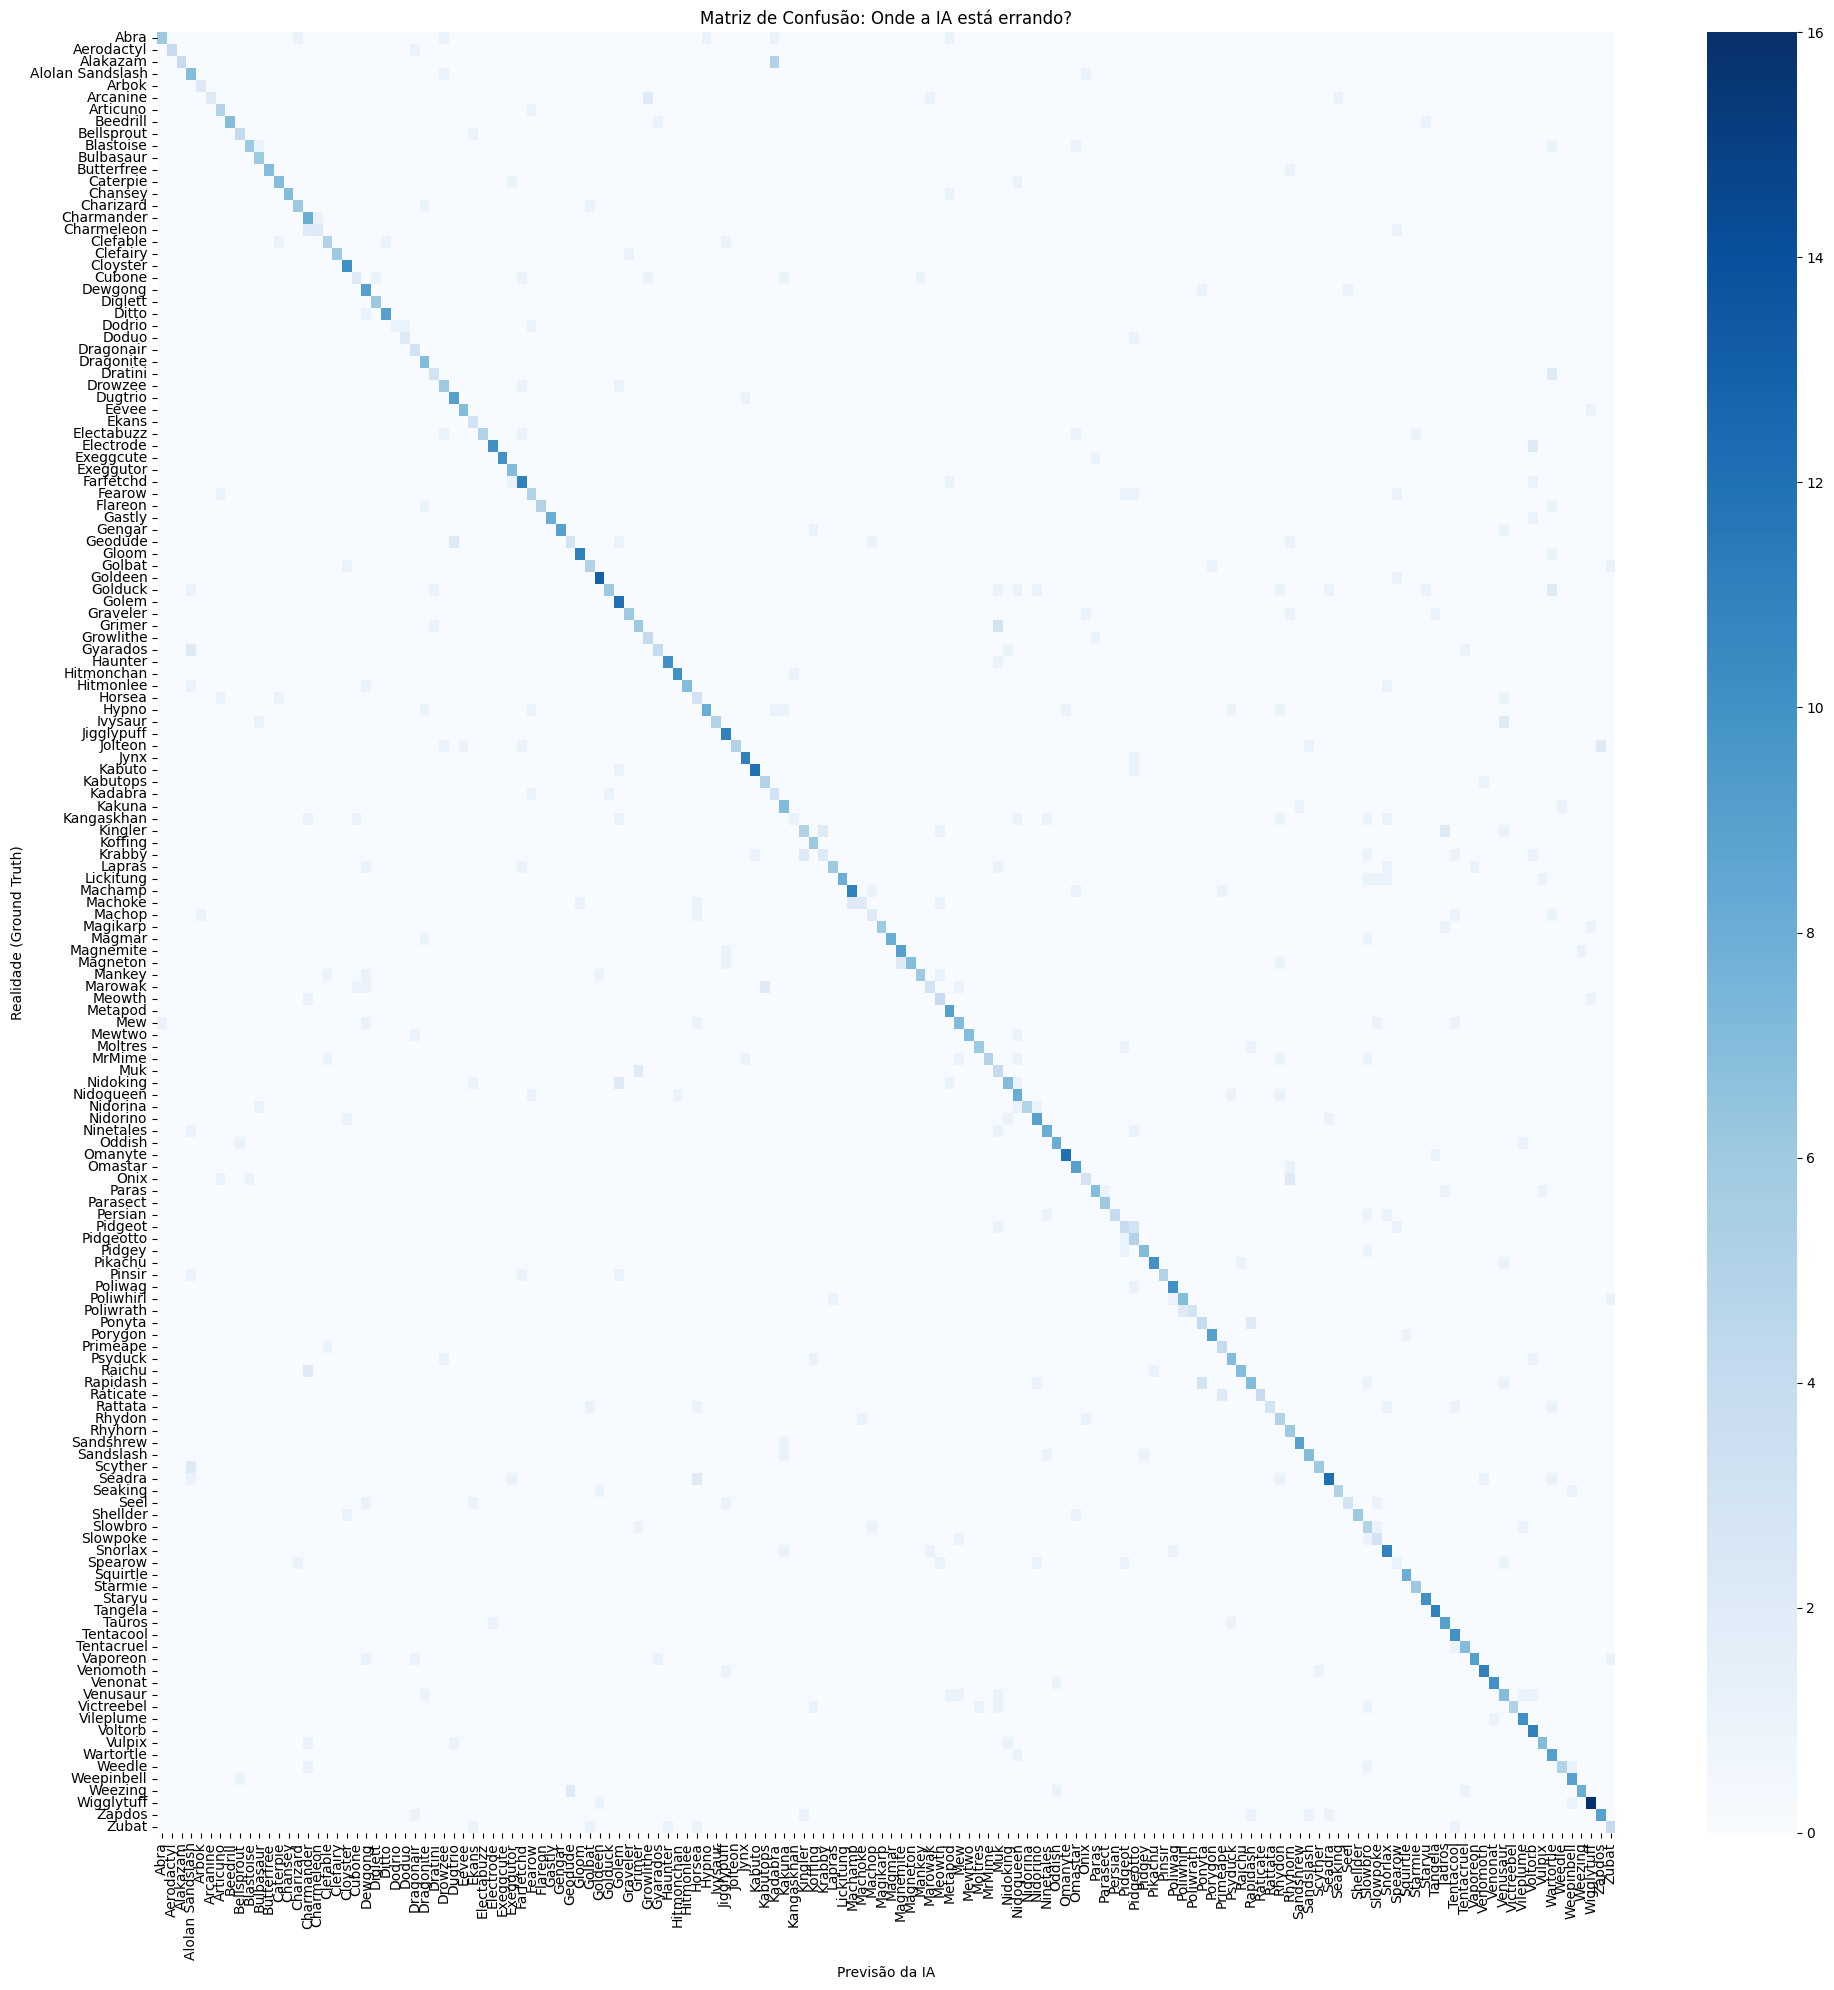

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

print("\n--- GERANDO RELATÓRIO DETALHADO DE PERFORMANCE ---")

# 1. Preparação dos dados
# Precisamos extrair os rótulos reais (y_true) e as previsões (y_pred)
# percorrendo o dataset de validação em lotes.
y_true = []
y_pred = []

print("Processando previsões no conjunto de validação...")
# Iteramos sobre o val_ds (que traz imagens e labels em batches)
for images, labels in val_ds:
    # A previsão retorna probabilidades para cada classe
    preds = model.predict(images, verbose=0)

    # Pegamos o índice da maior probabilidade (argmax)
    y_pred.extend(np.argmax(preds, axis=1))

    # Guardamos o rótulo real
    y_true.extend(labels.numpy())

# Convertemos para arrays numpy para facilitar o uso no sklearn
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# 2. Classification Report (Precisão, Recall, F1)
print("\n>>> RELATÓRIO DE CLASSIFICAÇÃO POR POKÉMON <<<")
# target_names usa seus class_names para mostrar os nomes em vez de números 0, 1, 2...
print(classification_report(y_true, y_pred, target_names=class_names))

# 3. Matriz de Confusão Visual
print("\n>>> GERANDO MATRIZ DE CONFUSÃO <<<")
cm = confusion_matrix(y_true, y_pred)

# Configuração do gráfico
plt.figure(figsize=(20, 20)) # Tamanho grande pois são muitas classes (150)
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Previsão da IA')
plt.ylabel('Realidade (Ground Truth)')
plt.title('Matriz de Confusão: Onde a IA está errando?')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

# Salva a imagem para você poder dar zoom depois
plt.savefig('matriz_confusao_pokemon.png', dpi=150)
print("Matriz de confusão salva como 'matriz_confusao_pokemon.png'.")
plt.show()